# Overhauser Effect
The Overhauser effect is the original DNP experiment, demonstrated on a conducting metal, and commonly used in solution-state DNP. However, it is also possible to obtain the Overhauser effect from non-conducting electrons such as in Trityl or BDPA. In this case, the effect comes from either modulation of the isotropic or dipolar part of the Hyperfine coupling

In [1]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
import SLEEPY as sl
import numpy as np
sl.Defaults['parallel']=False

In [2]:
%matplotlib notebook

## Example 1: Modulation of the Isotropic Hyperfine (J)

<IPython.core.display.Javascript object>


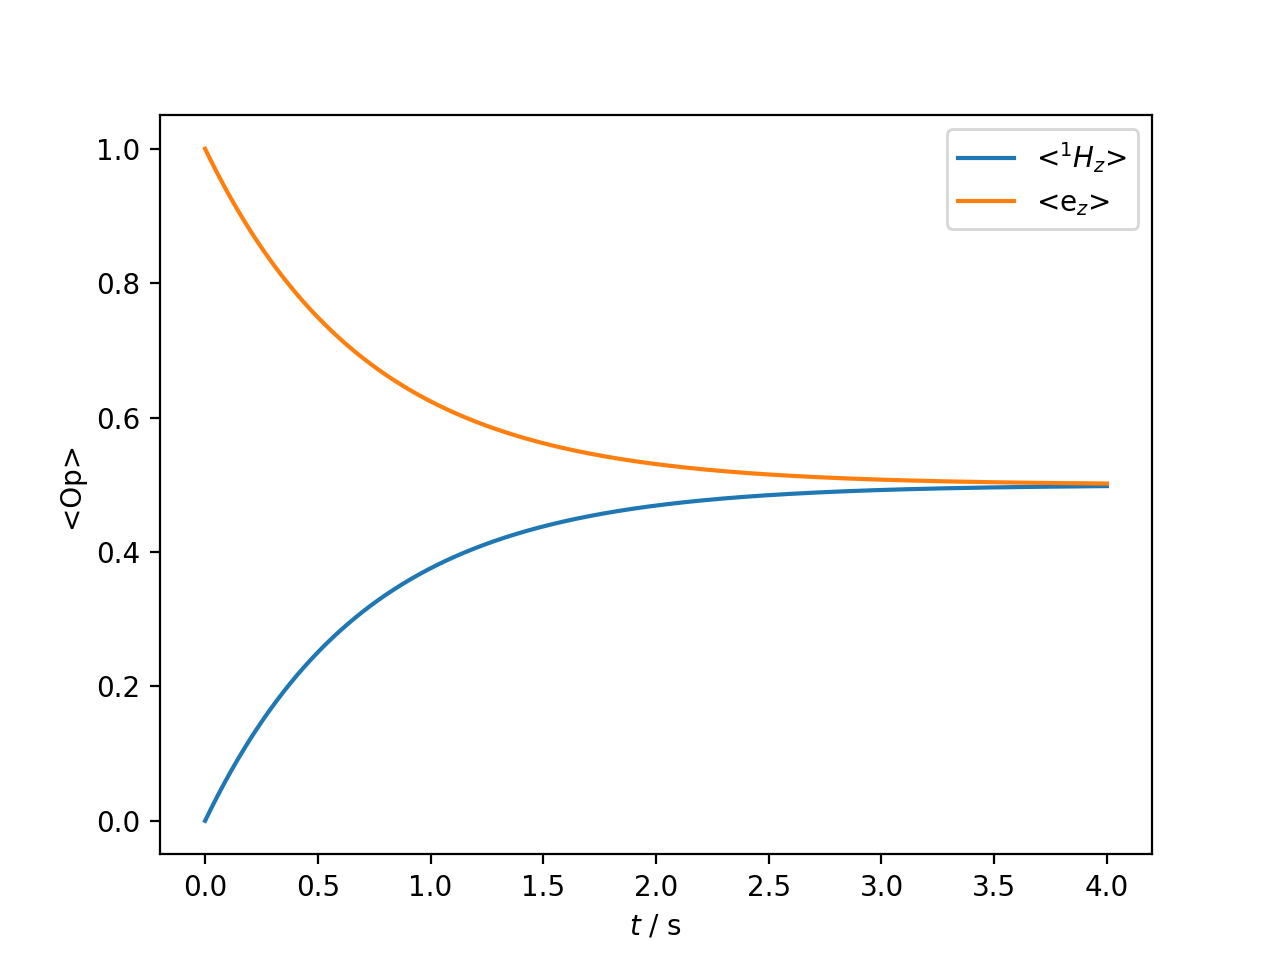

<AxesSubplot:xlabel='$t$ / s', ylabel='<Op>'>

In [23]:
ex0=sl.ExpSys(v0H=212,Nucs=['1H','e'],LF=True,vr=5000,n_gamma=30)
ex0.set_inter('g',i=1,gxx=2.0027,gyy=2.0031,gzz=2.0034)
Adip=[-1e6,-1e6,2e6]
Aiso0=.75e6
ex0.set_inter('hyperfine',i0=0,i1=1,Axx=Adip[0]+Aiso0,Ayy=Adip[1]+Aiso0,Azz=Adip[2]+Aiso0)
ex1=ex0.copy()
Aiso1=.25e6
ex1.set_inter('hyperfine',i0=0,i1=1,Axx=Adip[0]+Aiso1,Ayy=Adip[1]+Aiso1,Azz=Adip[2]+Aiso1)

L=sl.Liouvillian(ex0,ex1)
L.kex=sl.Tools.twoSite_kex(tc=1e-12)

seq=L.Sequence()

rho=sl.Rho('ez',['1Hz','ez'])

rho.DetProp(seq,n=20000)

rho.plot(axis='s')

## Example 2: Reorientation of the Dipolar Hyperfine

<IPython.core.display.Javascript object>


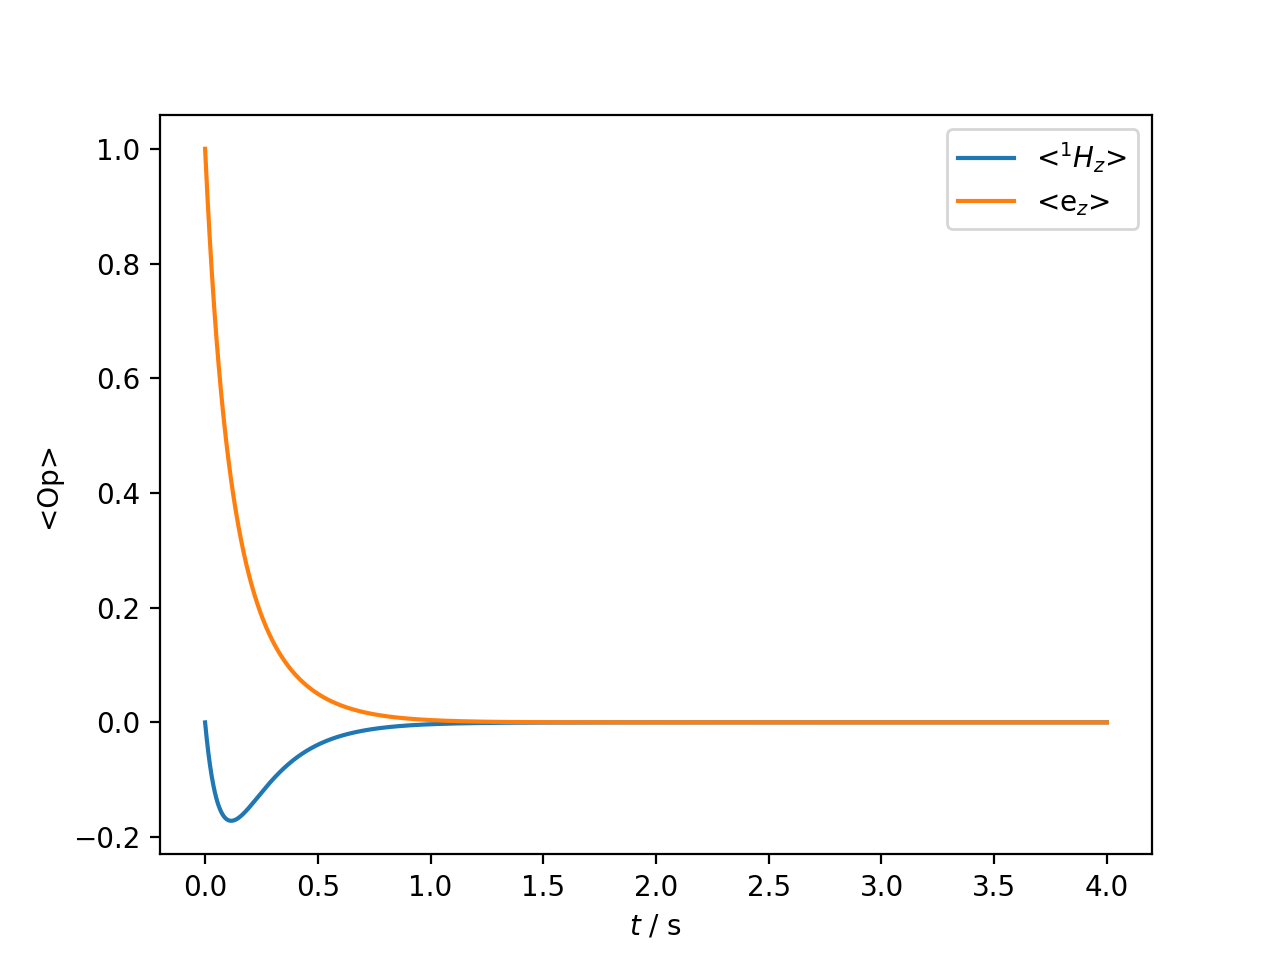

<AxesSubplot:xlabel='$t$ / s', ylabel='<Op>'>

In [24]:
ex1.set_inter('hyperfine',i0=0,i1=1,Axx=Adip[0]+Aiso0,Ayy=Adip[1]+Aiso0,Azz=Adip[2]+Aiso0,euler=[0,np.pi/4,0])

L=sl.Liouvillian(ex0,ex1)
L.kex=sl.Tools.twoSite_kex(tc=1e-12)

seq=L.Sequence()

rho=sl.Rho('ez',['1Hz','ez'])

rho.DetProp(seq,n=20000)

rho.plot(axis='s')

We see sharp contrasts between the two Overhauser effect mechanisms. When the scalar coupling is modulated, the total magnetization is conserved: it is simply transferred between the electron and nucleus until the magnetization is equilibrated. On the other hand, reorientation of the dipolar component both transfers magnetization between electron and nucleus, but also gradually destroys the total magnetization. We also notice that the sign of the transfer changes. This last point depends on the correlation time of motion driving the transfer. A slower correlation time inverts the sign. We can also simulate both mechanisms simultaneously (we reduce the size of the dipolar modulation to make the two effects occur on a similar timescale).

<IPython.core.display.Javascript object>


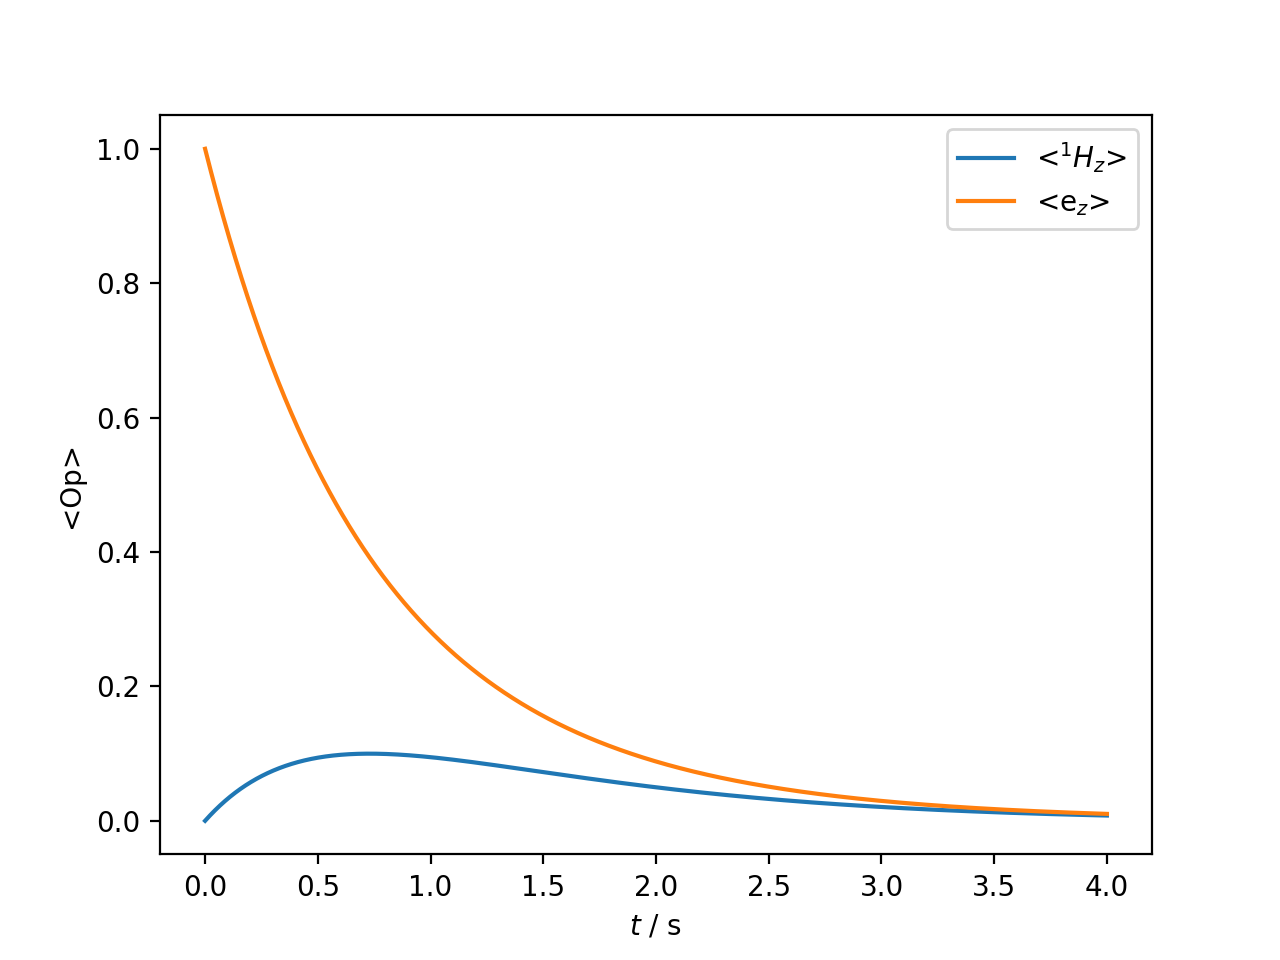

<AxesSubplot:xlabel='$t$ / s', ylabel='<Op>'>

In [26]:
ex1.set_inter('hyperfine',i0=0,i1=1,Axx=Adip[0]+Aiso1,Ayy=Adip[1]+Aiso1,Azz=Adip[2]+Aiso1,euler=[0,np.pi/16,0])

L=sl.Liouvillian(ex0,ex1)
L.kex=sl.Tools.twoSite_kex(tc=1e-12)

seq=L.Sequence()

rho=sl.Rho('ez',['1Hz','ez'])
rho.DetProp(seq,n=20000)
rho.plot(axis='s')

Then, the sign of the transfer turns positive, indicating the scalar mechanism, but the dipolar mechanism is also present and gradually destroys the magnetization. Note that in the real experiment, we would have a *much* faster electron relaxation, which would effectively decouple it from the $^1$H relaxation. However, if the electron is saturated, then during it's recovery, the $^1$H would become polarized. We cannot simulate this here, because the dynamically-induced relaxation cannot be thermalized in simulation (SLEEPY does include both thermalization for explicit relaxation and saturation in the lab-frame, but this relaxation process would not be induced by an exchange process).